In [361]:
import numpy as np                     #Linear Alzebra
import pandas as pd                    #Data importing
import matplotlib.pyplot as plt        #ploting

%matplotlib inline




In [362]:
#Importing the dataset using panda

data =pd.read_csv('Dataset1.csv')
data

,User continent,User country,Period of stay,Member years,Hotel name,Traveler type,Review month,Review weekday,Nr. reviews,Nr. hotel reviews,Helpful votes,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel stars,Nr. rooms,Score
0,North America,USA,Dec-Feb,9,Circus Circus Hotel & Casino Las Vegas,Friends,January,Thursday,11,4,13,NO,YES,NO,NO,YES,YES,3.0,3773,5
1,North America,USA,Dec-Feb,3,Circus Circus Hotel & Casino Las Vegas,Business,January,Friday,119,21,75,NO,YES,NO,NO,YES,YES,3.0,3773,3
2,North America,USA,Mar-May,2,Circus Circus Hotel & Casino Las Vegas,Families,February,Saturday,36,9,25,NO,YES,NO,NO,YES,YES,3.0,3773,5
3,Europe,UK,Mar-May,6,Circus Circus Hotel & Casino Las Vegas,Friends,February,Friday,14,7,14,NO,YES,NO,NO,YES,YES,3.0,3773,4
4,North America,Canada,Mar-May,7,Circus Circus Hotel & Casino Las Vegas,Solo,March,Tuesday,5,5,2,NO,YES,NO,NO,YES,YES,3.0,3773,4
5,North America,Canada,Mar-May,2,Circus Circus Hotel & Casino Las Vegas,Couples,March,Tuesday,31,8,27,NO,YES,NO,NO,YES,YES,3.0,3773,3
6,Europe,UK,Mar-May,4,Circus Circus Hotel & Casino Las Vegas,Couples,April,Friday,45,12,46,NO,YES,NO,NO,YES,YES,3.0,3773,4
7,North America,USA,Mar-May,0,Circus Circus Hotel & Casino Las Vegas,Families,April,Tuesday,2,1,4,NO,YES,NO,NO,YES,YES,3.0,3773,4
8,Asia,India,Mar-May,3,Circus Circus Hotel & Casino Las Vegas,Friends,May,Saturday,24,3,8,NO,YES,NO,NO,YES,YES,3.0,3773,4
9,North America,Canada,Mar-May,5,Circus Circus Hotel & Casino Las Vegas,Families,May,Tuesday,12,7,11,NO,YES,NO,NO,YES,YES,3.0,3773,3


In [363]:
#Listing the various categories 

categorical = list(data.select_dtypes(include=['object']).columns.values)
categorical

['User continent',
 'User country',
 'Period of stay',
 'Hotel name',
 'Traveler type',
 'Review month',
 'Review weekday',
 'Swimming Pool',
 'Exercise Room',
 'Basketball Court',
 'Yoga Classes',
 'Club',
 'Free Wifi']

In [364]:
#Encoding the categorical data to Numerical data using label encoder

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
oe= preprocessing.OneHotEncoder()

print("Chaning values with non number to numbers...")

for i in range (0, len(categorical)):
    data[categorical[i]] = le.fit_transform(data[categorical[i]])
    
print(" ")
print(" ")
print("Dataset after changing all values in numbers :")

data.head()

Chaning values with non number to numbers...
 
 
Dataset after changing all values in numbers :


,User continent,User country,Period of stay,Member years,Hotel name,Traveler type,Review month,Review weekday,Nr. reviews,Nr. hotel reviews,Helpful votes,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel stars,Nr. rooms,Score
0,3,46,0,9,2,3,4,4,11,4,13,0,1,0,0,1,1,3.0,3773,5
1,3,46,0,3,2,0,4,0,119,21,75,0,1,0,0,1,1,3.0,3773,3
2,3,46,2,2,2,2,3,2,36,9,25,0,1,0,0,1,1,3.0,3773,5
3,2,45,2,6,2,3,3,0,14,7,14,0,1,0,0,1,1,3.0,3773,4
4,3,3,2,7,2,4,7,5,5,5,2,0,1,0,0,1,1,3.0,3773,4


In [365]:
#Dividing dataset into feature and target variables

X=data.iloc[:,0:19]
Y=data.iloc[:,19].values

In [366]:
#Spliting dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)


In [367]:
#Importing libraries for predicting accuracy

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [368]:
####____XGboost____####

import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softmax',n_estimators=10,learning_rate=0.45,max_depth=7,colsample_bytree=1,subsample=1)

xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.45, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [369]:
#Predicting result for testing set

y_pred = xgb.predict(X_test)

C:\Users\ANURAG NIDHI\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [387]:
#Calculating the accuracy

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]*100
print("accuracy: %f" % (accuracy))

accuracy: 46.534653


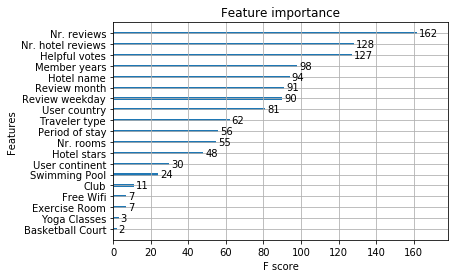

In [372]:
#Ploting feature importance curve

xgboost.plot_importance(xgb)
plt.show()

In [373]:
####____Random_Forest____####

from sklearn.ensemble import RandomForestClassifier
rdf= RandomForestClassifier(n_estimators=10,random_state=0,max_depth=7,criterion='entropy',verbose=3,min_samples_split=3)

rdf.fit(X_train,y_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=3, warm_start=False)

In [388]:
#Predicting the result for testing set and finding accuracy for the same

y_pred = rdf.predict(X_test)

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]*100

print("accuracy: %f" % (accuracy))

accuracy: 46.534653


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [375]:
#Showing the feature importace values

importances = rdf.feature_importances_
importances

sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)

print (sorted_feature_importance)

[(0.11677125323812705, 'Nr. hotel reviews'), (0.10879259847561724, 'Helpful votes'), (0.08911523074897527, 'Review month'), (0.08712303746492722, 'Nr. reviews'), (0.07505544900338118, 'Nr. rooms'), (0.07424086296614443, 'Member years'), (0.06584763935827673, 'Hotel stars'), (0.059984115297818906, 'Traveler type'), (0.059759588488528546, 'Review weekday'), (0.0595288450900602, 'User country'), (0.058445627211431025, 'Hotel name'), (0.03854087777498162, 'User continent'), (0.03695121884792406, 'Swimming Pool'), (0.029166244064396014, 'Period of stay'), (0.01170737802014264, 'Yoga Classes'), (0.009319225203488084, 'Basketball Court'), (0.008376238150286413, 'Club'), (0.007180333678955148, 'Exercise Room'), (0.004094236916538189, 'Free Wifi')]


In [376]:
#Finding general feature importance using recursive feature elimination

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

print("Finding features that are most relevent...")
print("             ")
print("             ")

rfe = RFE(estimator = Ridge(), n_features_to_select = 12)
rfe.fit(X_train, y_train)

feature_list = pd.DataFrame({'col':list(X_train.columns.values),'sel':list(rfe.support_ *1)})

print("Most contributing features in Score :")

print(feature_list[feature_list.sel==1].col.values)


Finding features that are most relevent...
             
             
Most contributing features in Score :
['User continent' 'Member years' 'Traveler type' 'Review month'
 'Review weekday' 'Swimming Pool' 'Exercise Room' 'Basketball Court'
 'Yoga Classes' 'Club' 'Free Wifi' 'Hotel stars']


In [377]:
#Using One hot encoder for changing categorical values into Numerical values

X_train=pd.get_dummies(X_train, columns=['User continent','Traveler type','Review month',
 'Review weekday','Swimming Pool','Exercise Room','Basketball Court','Yoga Classes','Club','Free Wifi'])
X_test=pd.get_dummies(X_test, columns=['User continent','Traveler type','Review month',
 'Review weekday','Swimming Pool','Exercise Room','Basketball Court','Yoga Classes','Club','Free Wifi'])

X_train1=X_train
X_test1=X_test

In [378]:
X_train.head()

,User country,Period of stay,Member years,Hotel name,Nr. reviews,Nr. hotel reviews,Helpful votes,Hotel stars,Nr. rooms,User continent_0,...,Exercise Room_0,Exercise Room_1,Basketball Court_0,Basketball Court_1,Yoga Classes_0,Yoga Classes_1,Club_0,Club_1,Free Wifi_0,Free Wifi_1
75,46,0,5,15,17,9,16,4.0,2884,0,...,0,1,0,1,0,1,0,1,0,1
442,45,1,0,0,5,0,5,5.0,3933,0,...,0,1,1,0,0,1,0,1,0,1
15,31,1,2,2,146,17,33,3.0,3773,0,...,0,1,1,0,1,0,0,1,0,1
325,8,1,3,7,240,76,115,3.5,732,0,...,0,1,1,0,1,0,0,1,0,1
388,46,2,4,19,27,12,51,3.5,787,0,...,0,1,0,1,1,0,1,0,0,1


In [379]:
####____XGboost____####

xgb = XGBClassifier(objective='multi:softmax',n_estimators=10,learning_rate=0.15,max_depth=7,colsample_bytree=1,subsample=1)

xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [380]:
#Predicting the result for testing set and finding accuracy for the same

y_pred = xgb.predict(X_test)

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]

print("accuracy: %f" % (accuracy))

accuracy: 0.465347


C:\Users\ANURAG NIDHI\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [381]:
#Making training dataset using relevant features and droping the rest

X_train=X_train.drop(['User country','Period of stay','Helpful votes','Nr. reviews','Hotel name'], axis=1)
X_test=X_test.drop(['User country','Period of stay','Helpful votes','Nr. reviews','Hotel name'], axis=1)

In [382]:
#Applying XGboost on new training dataset and calculating the accuracy

xgb = XGBClassifier(objective='multi:softmax',n_estimators=10,learning_rate=0.15,max_depth=7,colsample_bytree=1,subsample=1)

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]

print("accuracy: %f" % (accuracy))

accuracy: 0.435644


C:\Users\ANURAG NIDHI\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [383]:
####____Random_Forest____####
#Applying random forest and calculating its accuracy

rdf.fit(X_train,y_train)

y_pred = rdf.predict(X_test)

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]

print("accuracy: %f" % (accuracy))

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
accuracy: 0.465347


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
